Задание 1.3.1

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.ми

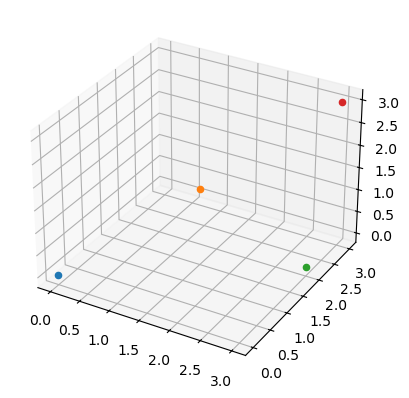

Расстояние Евклида от A до B: 2.598076211353316
Квадрат расстояния Евклида от B до C: 4.750000000000001
Расстояние Чебышева от C до D: 3.0
Расстояние Хемминга от D до A: 9.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Подписать точки на графике

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

point_A = np.array([0, 0, 0])
point_B = np.array([1.5, 1.5, 1.5])
point_C = np.array([3, 2, 0])
point_D = np.array([3, 3, 3])

ax.scatter(0, 0, 0) #A
ax.scatter(1.5, 1.5, 1.5) #B
ax.scatter(3, 2, 0) #C
ax.scatter(3, 3, 3) #D
plt.show()

print("Расстояние Евклида от A до B:", np.linalg.norm(point_A - point_B))
print("Квадрат расстояния Евклида от B до C:", np.linalg.norm(point_B - point_C)**2)
print("Расстояние Чебышева от C до D:", np.linalg.norm(point_C - point_D, ord = np.inf))
print("Расстояние Хемминга от D до A:", np.linalg.norm(point_D - point_A, ord = 1))

Задание 2.3.1

Для предыдущего примера (файла iris) поэкспериментируйте с параметрами классификатора:

Установите другое количество ближайших соседей (k = 1, 5, 10).
Установите размер тестовой выборки 15% от всего датасета.
Постройте графики и оцените качество моделей, проанализируйте результаты.

KNeighborsClassifier(n_neighbors=1)
accuracy: 0.913
KNeighborsClassifier()
accuracy: 0.957
KNeighborsClassifier(n_neighbors=10)
accuracy: 0.87


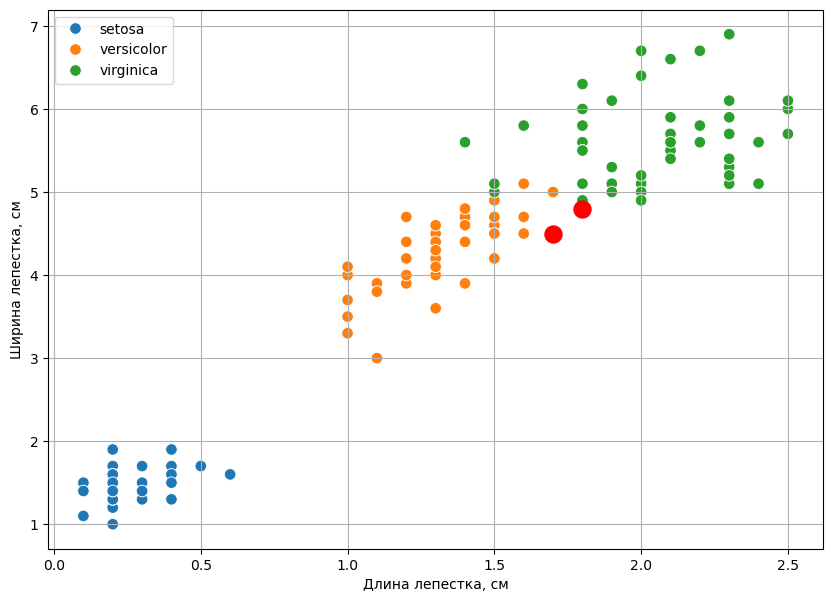

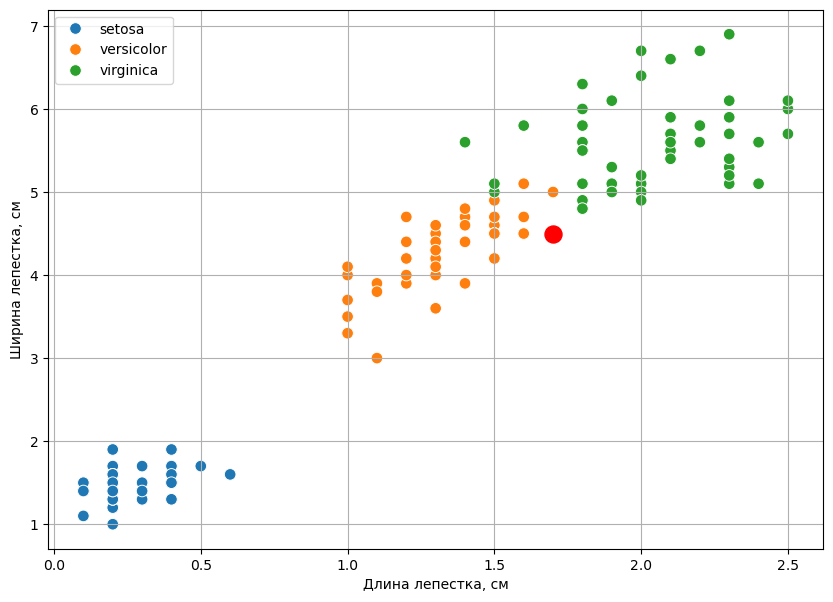

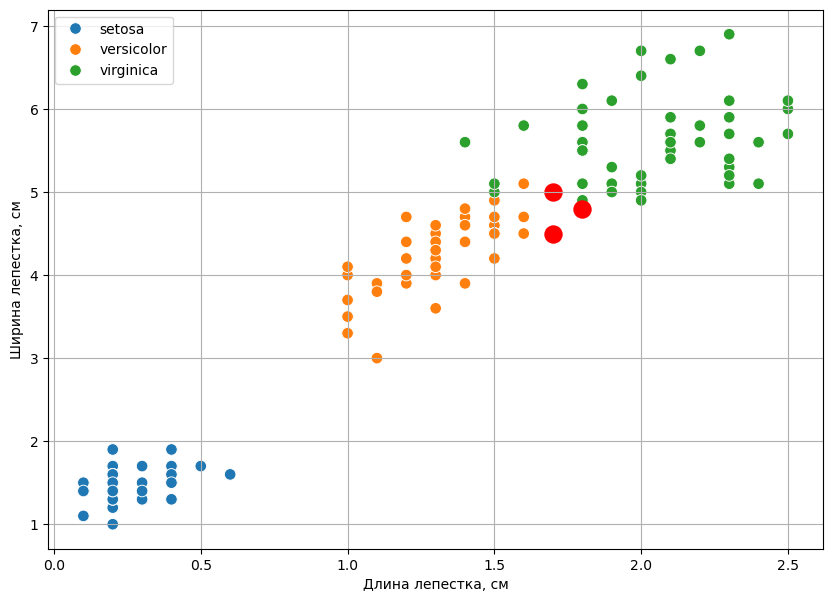

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
    
iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


def init_model(k, X_train, y_train, X_test):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(model)
    y_pred = model.predict(X_test)
    return y_pred


def graph(y_test, X_test, y_pred):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()
    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)


y_pred = init_model(1, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))
y_pred = init_model(5, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))
y_pred = init_model(10, X_train, y_train, X_test)

graph(y_test, X_test, y_pred)
print((f'accuracy: {accuracy_score(y_pred, y_test) :.3}'))

Задание 3.3.2

Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [32]:
from sklearn.feature_extraction import DictVectorizer

eye_color = [
    {'голубые': 1, 'карие': 0, 'зеленые': 0, 'серые': 0},
    {'голубые': 0, 'карие': 1, 'зеленые': 0, 'серые': 0},
    {'голубые': 0, 'карие': 0, 'зеленые': 1, 'серые': 0},
    {'голубые': 0, 'карие': 0, 'зеленые': 0, 'серые': 1},
    {'голубые': 0, 'карие': 1, 'зеленые': 0, 'серые': 0},
    {'голубые': 1, 'карие': 0, 'зеленые': 0, 'серые': 0},
    {'голубые': 0, 'карие': 0, 'зеленые': 0, 'серые': 1},
    {'голубые': 0, 'карие': 0, 'зеленые': 1, 'серые': 0},
]

dict_vect = DictVectorizer(sparse = False)
features = dict_vect.fit_transform(eye_color)
features

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])